# 14 - Modeling Earth's orbit around the Sun

## Student exercise

Use `odeint` to calculate the orbit of the Earth around the Sun. The equations of motion for the position ${\bf r}=(x,y)$ of the planet in its orbital plane are the same as for those for any orbiting body and are given by \begin{equation*} \frac{\mathrm{d}^2{\bf r}}{\mathrm{d}t^2} = -GM\frac{{\bf r}}{r^3} \end{equation*} where $G = 6.6738e-11$ m$^3$kg$^{-1}$s$^{-2}$ is Newton's gravitational constant and $M = 1.9891\times 10^{30}$ kg is the mass of the Sun. Also note for later that the radius of the Sun is $R=6.96\times 10^8$ m.

The orbit of the Earth is not perfectly circular, the planet being sometimes closer and sometimes further from the Sun. When it is at its closest point, or *perihelion*, it is moving precisely tangentially (i.e., perpendicular to the line between itself and the Sun) and it has a distance $1.4710 \times 10^{11}$ m from the Sun. At its furthest point, or *aphelion*, it has a distance $1.521 \times 10^{11}$ m and is also moving precisely tangentially.

* a) Write a program that models the Earth's orbit around the Sun. There is no need to start from scratch! Instead, start from one of the programs that we developed in the last set of notes (included below and modified slightly) and modify it to handle this scenario. Start the simulation with the Earth at aphelion and use trial and error to determine the initial velocity, adjusting this value until the simulated perihelion matches the value given above. (*** Hint: At aphelion and perihelion, let the Earth be located on the $x$-axis and have a velocity that is purely directed in the $\pm \hat{y}$ direction.***)

* b) Based on your simulation, determine the length of time that passes for a single orbit of the Earth. Express your answer in days.

* c) The gravitational potential energy fo the Earth is $-GMm/r$, where $m=5.9722\times 10^{24}$ kg is the mass of the planet, and its kinetic energy is $\frac{1}{2}mv^2$ as usual. Modify your program to calculate both of these quantities at each step, along with their sum (which is the total energy), and make a plot showing all three as a function of time on the same axes. What do you observe?

### Student work:

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

### Pre-generated solution:

Perihelion is at 147101253465.80078 meters
A year is 365.21097000000003 days


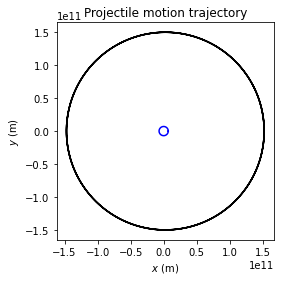

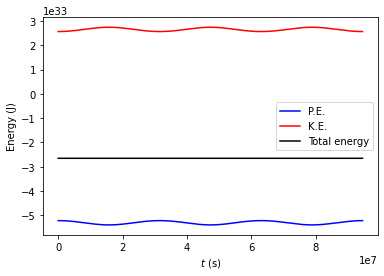

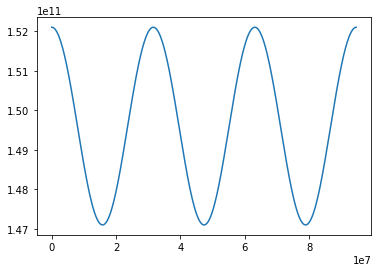

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

G = 6.67408e-11
M = 1.9891e30 # Mass of central body (Sun in this case)
R = 6.96e6 # radius of central body (Sun in this case)

def f(r,t):
    vecr = np.array([r[0],r[1]])
    vecv = np.array([r[2],r[3]])
        
    f = vecv
    fv = -G*M/(np.linalg.norm(vecr)**3)*vecr
    
    return f[0],f[1],fv[0],fv[1]


x0 = 1.521e11 # Initial x position of orbiting body
y0 = 0 # Initial y position of orbiting body
vx0 = 0 # Initial x component of velocity
vy0 = 29295.5 # Initial y component of velocity
t0 = 0.0     
tf = 365*24*60*60*3   
N = 1000000
h = (tf-t0)/N 
 
tpoints = np.arange(t0,tf,h)

# set up array with initial values x0,y0,vx0,vy0
r = np.array([x0,y0,vx0,vy0],float)

sol_points = odeint(f,r,tpoints) 

xpoints = sol_points[:,0]
ypoints = sol_points[:,1]
rpoints = np.sqrt(xpoints**2 + ypoints**2)
print('Perihelion is at {0} meters'.format(np.min(rpoints)))

# Determine coordinates for Sun's surface (expanded by factor to display visibly)
ang = np.arange(0,2*np.pi,.01)
Sx = 1000*R * np.cos(ang)
Sy = 1000*R * np.sin(ang)

#indx = np.argmax(rpoints == np.min(rpoints))
indx = np.argmax(ypoints < 0)
print('A year is {0} days'.format(2*tpoints[indx]/60/60/24))


plt.figure(1)
# Plot projectile results and Sun's surface
plt.plot(xpoints,ypoints,'k')#,'k-',label='$y$ (m)')
plt.plot(Sx,Sy,'b')

plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')
plt.title('Projectile motion trajectory')
plt.gca().set_aspect('equal', adjustable='box') # Force equal scales on x and y axes
plt.show()

plt.figure(2)
m = 5.9722e24
U = -G*m*M/rpoints
T = 0.5*m*(sol_points[:,2]**2+sol_points[:,3]**2)
plt.plot(tpoints, U, 'b', label='P.E.')
plt.plot(tpoints, T, 'r', label='K.E.')
plt.plot(tpoints, U+T, 'k', label='Total energy')
plt.legend(loc='best')
plt.xlabel('$t$ (s)')
plt.ylabel('Energy (J)')
plt.show()

plt.figure(3)
plt.plot(tpoints,rpoints)
plt.show()

